In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels1 = [
    # 0.2,
    # 0.3,
    # 0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.8,
    0.9,
    1,
    1.1
]
# labels2 = [
#     1.1,
#     1.2,
#     1.3,
#     1.4,
#     1.5,
# ]
# labels3 = [1.6, 1.7, 1.8, 1.9]
# labels4 = [
#     2,
#     2.1,
#     2.2,
#     2.3,
# ]
# labels5 = [2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]



df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
masses1 = []
masses2 = []
masses3 = []
masses4 = []
masses5 = []

for label in labels1:
    masses1 += [label]
    df1 += [pd.read_csv(f"{label}.data", sep="\s+")]
# for label in labels2:
#     masses2 += [label]
#     df2 += [pd.read_csv(f"{label}.data", sep="\s+")]
# for label in labels3:
#     masses3 += [label]
#     df3 += [pd.read_csv(f"{label}.data", sep="\s+")]
# for label in labels4:
#     masses4 += [label]
#     df4 += [pd.read_csv(f"{label}.data", sep="\s+")]
# for label in labels5:
#     masses5 += [label]
#     df5 += [pd.read_csv(f"{label}.data", sep="\s+")]


In [19]:
pred=0.78

df=[]
masses = []

if 0 < pred <= 1:
    df = df1
    masses=masses1
    labels=labels1
# elif 1 < pred <= 1.5:
#     df = df2
#     masses=masses2
#     labels=labels2
# elif 1.5 < pred <= 1.9:
#     df = df3
#     masses=masses3
#     labels=labels3

# elif 1.9 < pred <= 2.3:
#     df = df4
#     masses=masses4
#     labels=labels4

# elif 2.3 < pred <= 3:
#     df = df5
#     masses=masses5
#     labels=labels5



ages = []
lums = []
ages1 = []
lums1 = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]
print(ages)
min_length = min(len(lum) for lum in lums)
ages = np.log10([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])
print(ages.shape)
print(lums.shape)


[1554    1.242950e+08
1555    1.254657e+08
1556    1.266119e+08
1557    1.277403e+08
1558    1.288543e+08
            ...     
3325    9.237206e+10
3326    9.237807e+10
3327    9.238407e+10
3328    9.239005e+10
3329    9.239601e+10
Name: star_age, Length: 1776, dtype: float64, 1817    9.530354e+07
1818    9.580127e+07
1819    9.629684e+07
1820    9.679135e+07
1821    9.728573e+07
            ...     
3479    5.804443e+10
3480    5.804868e+10
3481    5.805291e+10
3482    5.805713e+10
3483    5.806134e+10
Name: star_age, Length: 1667, dtype: float64, 2010    7.092492e+07
2011    7.119529e+07
2012    7.146458e+07
2013    7.174734e+07
2014    7.204423e+07
            ...     
3549    3.503082e+10
3550    3.503393e+10
3551    3.503704e+10
3552    3.504013e+10
3553    3.504322e+10
Name: star_age, Length: 1544, dtype: float64, 2134    5.544170e+07
2135    5.575946e+07
2136    5.609309e+07
2137    5.644341e+07
2138    5.681125e+07
            ...     
3530    2.173977e+10
3531    2.174232e+10


In [20]:
from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)
model = LnR()
model.fit(np.array([masses]).T, output)
print(ages.shape)
print(lums.shape)


(8, 2180)
(8, 1090)
(8, 1090)


(1, 2180)
(1, 2180)
(8, 1090)
(8, 1090)
[0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 1, 1.1]


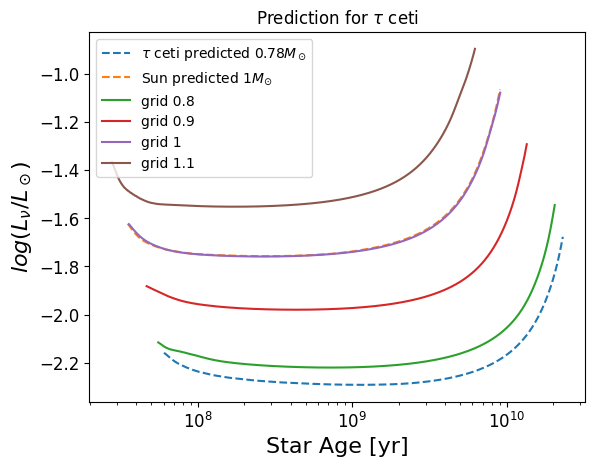

In [21]:

prediction = model.predict([[pred]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10**predicted_ages[0], predicted_lums[0],linestyle='--' ,label=fr"$\tau$ ceti predicted ${pred}M_\odot$")

prediction = model.predict([[1]])
predicted_agess = prediction[:, ::2]
predicted_lumss = prediction[:, 1::2]
print(prediction.shape)

plt.plot(10**predicted_agess[0], predicted_lumss[0].T,linestyle='--' ,label=r"Sun predicted $1M_{\odot}$")
print(ages.shape)
print(lums.shape)

print(labels)
for i, label in [*enumerate(labels)][4:]:
    plt.plot(10**ages[i], lums[i], label=f"grid {label}")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'$log(L_\nu/L_\odot)$',fontsize=16)
plt.xlabel('Star Age [yr]',fontsize=16)
plt.legend(fontsize=10)
plt.title(r'Prediction for $\tau$ ceti')
plt.xscale('log')

Text(0.5, 1.0, 'Predicted flux of $\\tau$ ceti')

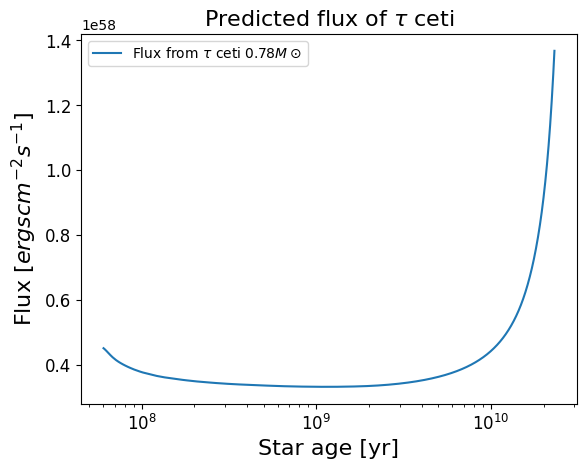

In [22]:
def flux(l,r):
    return l/4*np.pi*r**2

lumt=(10**predicted_lums[0])*3.828e33
lums=(10**predicted_lumss[0])*3.828e33
flt=flux(lumt,14.712e12)
fls=flux(lums,3.65*3.086e18)

plt.plot(10**predicted_ages[0],flt, label=r'Flux from $\tau$ ceti $0.78M\odot$')
plt.xscale('log')
plt.ylabel(r'Flux [$ergs cm^{-2} s^{-1} $]',fontsize=16)
plt.xlabel('Star age [yr]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.title(r"Predicted flux of $\tau$ ceti", fontsize=16 )

Text(0.5, 1.0, 'Predicted flux of Sun')

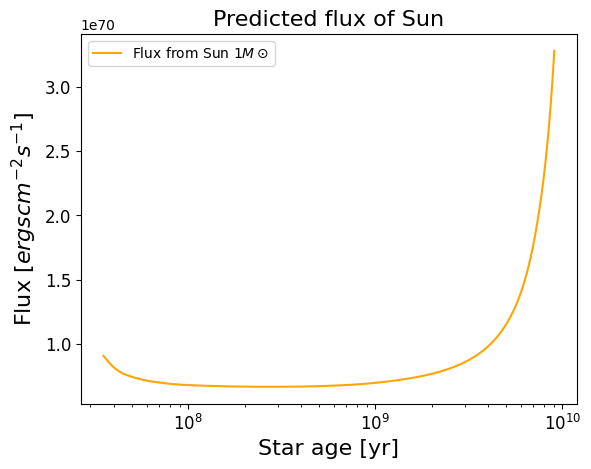

In [23]:
plt.plot(10**predicted_agess[0],fls, label=r'Flux from Sun $1M\odot$', color='orange' )
plt.xscale('log')
plt.ylabel(r'Flux [$ergs cm^{-2} s^{-1}$]',fontsize=16)
plt.xlabel('Star age [yr]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.title(r"Predicted flux of Sun", fontsize=16 )


(100, 2180)


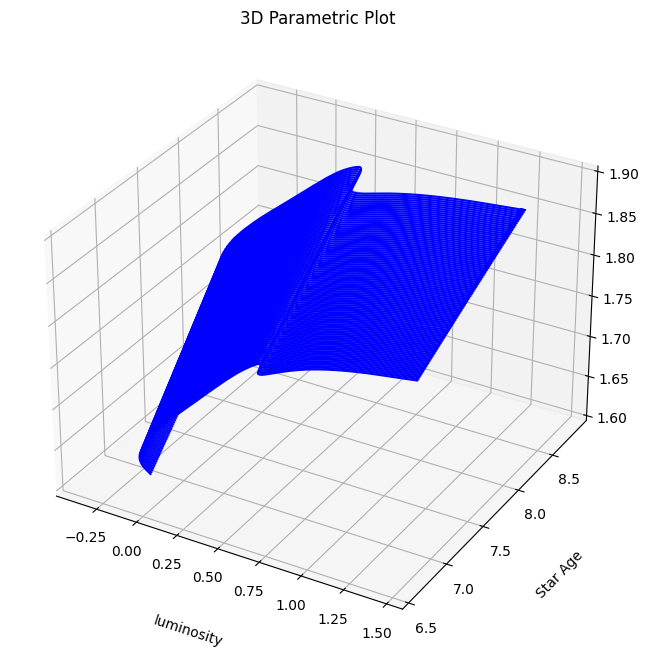

In [24]:
pred = np.linspace(1.6, 1.9, 100)
prediction = model.predict(np.array([pred]).T)
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

# plt.plot(predicted_ages[0], predicted_lums[0], label=f"predicted {pred}")


from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()


for i,_ in  enumerate(pred):
    t = pred[i]
    x = predicted_lums[i]
    y = predicted_ages[i]

    ax.plot3D(x,y,t, color='b')
    ax.set_title('3D Parametric Plot')

    # Set axes label
    ax.set_xlabel('luminosity', labelpad=20)
    ax.set_ylabel('Star Age', labelpad=20)
    ax.set_zlabel('Mass', labelpad=20)